<a href="https://colab.research.google.com/github/ChristopherCaperlac/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numerical Error and Instability:** Similiar to other numerical methods that deal with integration and differentiation, there are different orders of **accuracy** between numerical methods of solving ODEs written with big O notation O(h^n). Since h is the step size is a constant we choose and n a constant power, the amount of error stays constant. But with the usage of Euler's method to solve these ODEs, error may not stay constant and may even grow unexpectedly quick. Small changes to the intial conditions or step size may lead to unstable behavior.  

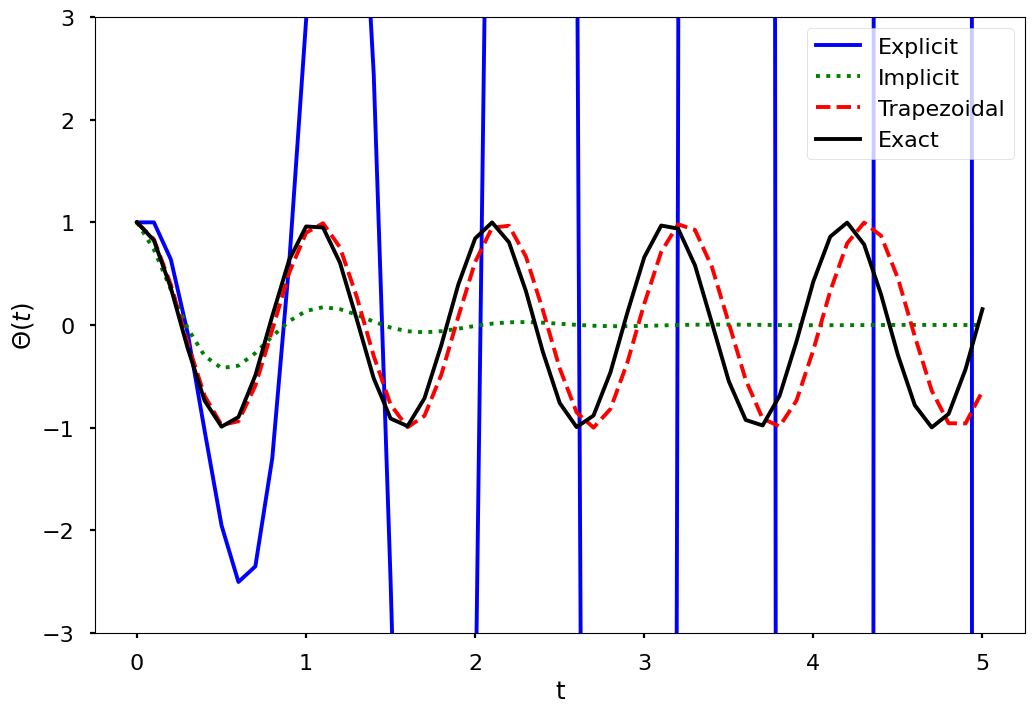

In [12]:
# from the textbook changing w to 6 shows a more pronounced instability even
# with the trapezoidal method
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 6
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Predictor-Corrector Methods:** Predictor-Corrector Methods essentially use the state function F at different points then take a weighted average to produce a more accurate answer of the next state. The Runge Kutta method is one example of a Predictor-Corrector Method which uses the concept of the Taylor series to further provide higher orders of accuracy. While these predictor-corrector methods call the state function more than once, they are more efficient at providing accuracy and stability then halving or dividing the step size of Euler's method.

